# TEXT MINING THE GREAT UNREAD

### Data Visualization Using Python - Melvin Wevers

__Digital Humanities Group @ KNAW Humanities Cluster (Amsterdam)__

```
melvinwevers (at) gmail.com
```
---
In this workshop, we will use several visualization techniques to explore datasets, and uncover patterns in textual data.  
We will start by using Matplotlib in Python and then work on graphing in Pandas, which relies on Matplotlib.


First, we will load some required libraries. 

In [1]:
#libraries
import glob
import numpy as np #we load numpy as np, so we can call the library using np instead of np
import pandas as pd

---

## 1. EXPLORING THE DATASET

For this workshop, we will be working with the British newspaper Financial Times.   
Because of copyright restrictions, the dataset only includes the month September for the years 1939, 1966, and 1991.

The following code block downloads the json files in the 'data' folder and places them in a Pandas dataframe.  
A Pandas Dataframe is a tabular structure similar to an Excel spreadsheet.   
You can do operations on the numbers and text in the dataframe.

In [ ]:
path ='data' #here we define the path
allFiles = glob.glob(path + "/*.json")
frame = pd.DataFrame() #here we initialize a Pandas DataFrame
list_ = []
for file_ in allFiles:
    frame = pd.read_json(file_) #since the files are in json format we use read_json. Other options include read_csv
    list_.append(frame) 
df = pd.concat(list_)

We have now loaded the documents into a dataframe with the name 'df'.

---

### Assignment 1: Exploring the dataset
For the first assignment, we will explore the dataset.  
Use the following functions to explore the dataframe with the name 'df':
```
df.head() #this shows the first lines (put a number between the parenthesis to determine how many lines)
df.tail()
df.shape[0] #this shows the (horizontal) size of the dataframe. Replace the 0 with 1 for vertical size.
```
Make a markdown cell (with + or 'b') and note the names of the columns that contain the __text__ in the articles and the __date__ of the articles.

---

### Assignment 2: Investigate cells that contain specific word(s)

If you want to view cells that contain specific text (in this case Aarhus) you can use:
```
df[df["text_content"].str.contains("Aarhus")]
```
If you want to view the full contents of the cell use:
```
pd.set_option('display.max_colwidth', -1)
```
For truncation set the value -1 to the width of the column, for instance 50

Replace the string with other string to get an idea of the type of articles in the dataset. 

---


## 2. WORKING WITH DATES

If we want to study changes over time, we need a variable that indicates time.  
In this case we will use the 'date' column.  
There are two main approaches if you want to work with dates. 

### 2.1. Setting the date column as an index
For this approach, we convert the column with the dates to an index based on dates.  
By default the index is a list of number linked to each row.  
We can then use this index as a variable. 

In [ ]:
#the function to_datetime tells Pandas that the column includes dates
df['paper_dc_date'] = pd.to_datetime(df['paper_dc_date']) 

#the function set_index tells Pandas to use the 'date' column as the index. 
#By specifying the drop parameter as 'False' we tell Pandas to keep the original column with the dates. 
#Otherwise this column is removed. Since we need it for the Second Approach, we want to keep it. 
df = df.set_index(['paper_dc_date'], drop=False)

__Inspect the dataframe to see what has changed__

--- 

### 2.2. Turning elements of the dates in separate variables
For this approach we will take elements from the date column and turn those into separate variables.  
For instance, turn the number of the month into a separate column, and the day of the week.  
The following line of code creates a column 'day' with the numbers of the day in the month.
```
df['day'] = df['paper_dc_date'].dt.day 
```

--- 

### Assignment 3: Making columns with date information
Make new columns that contains the number of the week, month, and year.  
Which of these columns is redundant for our dataset? 

---

We can now use both the index and the columns with date information to plot graphs on a temporal axis.  
But before we start doing this we need to generate some additional statistics about the dataset that we can plot over time.

---

## 3. GENERATING TEXT STATISTICS

For this workshop, we will generate some basic descriptive statistics about the articles in the Financial Times.  
We will use this information to generate the graphs in the remainder of this workshop. 

In [ ]:
#calculate length of articles
df['article_length'] = df['text_content'].str.len()

#calculate mean length per day
df['mean_article_length'] = df['article_length'].groupby(pd.TimeGrouper('D')).aggregate(np.mean).dropna()

In [80]:
#calculate number of words
def word_counter(row):
    tokens = row["text_content"].split(" ")
    return len(tokens)

df["number_of_words"] = df.apply(word_counter, axis=1)

#calculate mean number of words per day
df['mean_number_of_words'] = df['number_of_words'].groupby(pd.TimeGrouper('D')).aggregate(np.mean).dropna()

__Inspect the new columns in the dataframe__

---

## 4. VISUALIZING DESCRIPTIVE TEXT STATISTICS

For plotting we are going to be using Matplotlib and the Pandas extension build on this library.  

We'll start by import the matplotlib library into python.

In [83]:
#this imports the library as plt
import matplotlib.pyplot as plt 
#this tells Jupyter Notebook to show the graph inside the notebook
%matplotlib inline 

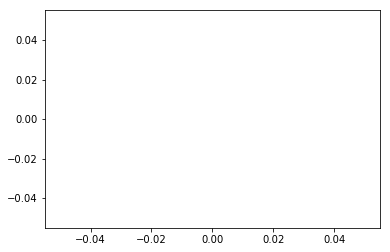

In [9]:
plt.plot()
#this shows the graph. In Jupyter this happens automatically after plt.plot, but it's good practice to include it
plt.show() 

This yields an empty plot. <br/>
This is because we have only told python to show a plot, but we haven't provided it with what to plot and how to plot it.

---

## 4.1. Line Graphs

We can call Matplotlib using plt (since we loaded the library as plt).  
The function to plot line graphs in matplotlib is:

```
plt.plot(x_values, y_values)
```

Matplotlib will accept any iterable object, like NumPy arrays and pandas.Series instances as input for a line graph.

### Assignment 4: Generating Line Graphs

We will now generate two line graphs for the year 1991 using two different statistics. 

* Generate a line graph for the year 1991 that shows the date on the x-axis and the length of the articles on the y-axis
* Generate a line graph for the year 1991 that shows the date on the x-axis and the mean number of words in the articles on the y-axis

__Tip__:

* Remember we set the date as the index. You can access the index using ```df.index```
* You can select a year using ```df['1966']```
* To select the index for a particular year you need to type ```df['1966'].index```
* To select a particular column in a year you can use ```df['1996']['newspaper_title']```
* Remember to always close with ```plt.show()```


--- 

The x-axis for the graph we generated is not very readable.   
One way to fix this is to turn the labels on the x-axis.  
We can do this with the xticks function. 

```
matplotlib.pyplot.xticks()
```
Graphing includes a lot of Googling and reading documentation.  
Try and see if you can figure out how to rotate the xticks here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks

### Assignment 5 
* Generate a line graph for 1991 that shows the __date__ on the x-axis and the __mean length of the articles__ on the y-axis.  
* But also rotate the x-axis with __90 degrees__.  
* Reflect on what the graph shows us and note this down in a Markdown cell.

### Make the graph a little fancier
We still need to add labels to the x-axis and the y-axis, and we need to give the graph a title.  
* To set the x-axis label we can pass a string to the function: ```xlabel()```  
* For the y-axis label, pass a string value to: ```ylabel()```  
* To give the graph a title pass a string value to: ```title()```  
* You can also give your graph a style using ```plt.style.use()```

For an overview of the styles see: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

__Tip__: To call a function for matplotlib use ```plt.xlabel()```

### Assignment 6### 

* Generate a line graph for 1991 that plots the mean length of the articles.  
* Rotate the labels 
* Give the graph a title 
* Label the x-axis and y-axis.

__Tip__: You can copy parts of your earlier code

### The Elements of the Graph

There are two central elements, the __Figure__ object and the __Axes__ object.


The Figure object is container and contains the entire visualization.  
One Figure can, for instance, include multiple graphs. 
You can initialize a figure using:
```
fig = plt.figure()
```
The Axes object contains the information that is used to plot the graph within a Figure.   
An Axes object holds:  
* the values, 
* ticks on the x-axis and y-axis, 
* and visual symbols such as markers, lines, and gridlines.  

A Figure object can contain multiple Axes objects, that is multiple line graphs in one Figure. 

You can create an Axes object using:
```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```
If you wanted to plot two graphs next to each other. You would use:
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```

### Assignment 7: Making Axes and Figures

Create an empty Figure that contains four Axes objects positioned in 2 rows and 2 columns.  
* First make the Figure object
* Then add four Axes objects
* Specify where to position the Axes objects

---

These graphs could use a little padding between them.  
To increase the padding between them you can add to the previous block.  
Add this and play around with the values.
```
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

```


---

### Assignment 8: Making Graphs with Real Data

We are now going to fill the Axes objects with actual data. 
* Make a figure that contains two subplots (Axes Objects) underneath each other.
* Show a line graph with the mean number of words in 1966 and another one for 1991. 

__Tip__ You need to call the plot function on the Ax object: 
```
ax.plot(x_values, y_values)
```

---

As you can see the second graph does not fit within the image.     
One way to solve this is to increase the size of the entire Figure object.  
You can do this with:
```
fig = plt.figure(figsize=(width, height))
```
Adjust the previous block and set a width and height that works for you. 

### Assignment 9: Multiple line graphs in one figure

Of course you also plot multiple line graphs into one figure.
* Plot a graph that shows the mean number of words for 1939, 1966, and 1991 into one figure
* You need to repeat the ```plt.plot``` function three times
* Think about which variable you want to use for the x-axis. The date index or the 'day' column


---

Python automatically assigns colors to the different line graphs.  
If you don't like these colors you can add the parameter.
```
c = 'name of colour'
``` 

You can also add labels to the lines with the parameter 
```
label = 'name of label'
```
If you want to add a legend you add the line. Feel free to change the value. 
```
plt.legend(loc='upperleft') 
```

### Assignment 10: Add colors, labels, a title, and a legend to the chart from Assignment 9
* copy the code from assignment 9
* add a title
* add color for each line graph
* add a label that indicates the year
* add a legend 


---

## 4.2. Bar Chart

In addition to line graphs, an often used visualization is the bar graph.  
To bee able to create a bar chart, we need to tell Python a couple of things:
* the position of the individual bars
* the width of the bars
* position of the labels

We will use the ```ax.bar(bar_positions, bar_heights, width)``` method, this allows for a lot of customization of the visuals.

The __bar_positions__ parameter determines the where we place the left side of the bar on the x-axis.  
The __bar_heights__ parameter is used for the height of the bar.  
The __width__ parameter determines the widht of the bar. 

These parameters need multiple values in the form of a list [10, 20, 30]

### Bar Position

To space the bars in evenly distributed spaces, we use the following function:
```
np.arange()
```
This numpy function returns evenly spaces values in the form of a list. 
For instance
```np.arange(5)``` returns ```[0,1,2,3,4]```



In [139]:
bar_positions = np.arange(3)

### Bar Height
For the height of the bears we will calculate the number of articles per year. 

In [ ]:
bar_heights = df['year'].value_counts().sort_index()

### Assignment 11: Making a bar graph
* first initialize a Figure and Axes object using ```fig,ax = plt.subplots()```
* Then use the bar function on the Axes object with a width of .5, and the variables bar_positions and bar_heights

This graph contains 5 tick marks.  
We actually want the tickmarks on the x-axis to correspond to our years. 
You can set the number of tick marks by passing a list to ```ax.set_xticks(range(0,3))```  
In this case the number of tickmarks correspond to the number of number of bars.  
So we could also pass the variable bar_positions.

### Assignment 12: Add visual aids to bar graph. 
* copy the code from the previous bar chart
* give the bar chart a title
* give the x and y-axis a label
* set the number of tickmarks
* give the bar charts individual labels using ```ax.set.xticklabels()```

---

This might seem like a lot of work for a simple bar chart.  
However, you can reuse parts of existing code and you are also able to fully customize your bar chart.  
With libraries such as Pandas and Seaborn you can generate template bar charts in a less verbose manner.  

## 4.3. Histogram 
We use histograms to visualize the distribution of quantitative data.  
This can help us analayze how the length of articles is distributed in a dataset.   
With bar charts, the number of bars corresponds to the categorical data (for example, men vs women).

In the case of a histogram we need to define in how many bars (_bins_) we want to divide our data.  
If we do not define this Matplotlib determines this. 

You can create a histogram with the function
```
plt.hist(x, bins, range)
```
* x = the input value  
* bins = the number of bins  
* range = the upper and lower range of the bins

### Assignment 13: Make a histogram
Generate a histogram for the column 'article_length'. Do not fill out the bins and range parameters yet.

---

As you can see most articles contain less than 25,000 characters.  
This set of articles are all grouped into two bins.  
The articles with very high values are probably outliers.

Let's increase the number of bins and also set the range.   
This makes it easier for us to zoom in on the distribution.  
Play around with these values and see what happens.

### Assignment 14: Making multiple histograms
For this assignment we will plot three histograms of the column article length for the years 1939, 1966, and 1991.

* initialize the Figure object and give the graph a size
* initialize three Axes Objects and places them next to each other or underneath each other
* Call the hist function on each ax object and set the number of bins and the range. 
* Also set an x and y label for each of the ax objects
* You can give the entire Figure a title with ```fig.suptitle("Three Histograms")```

## Saving a Graph
If you want to save a graph as a file. You can call the function ``savefig`` on your Figure object.  
For example, 

```
fig.savefig('test.png', bbox_inches='tight', dpi=300)
```

The first parameter defines the name and file format, the second the padding around the image, and the last the number of dots-per-inch. 

## Further Exploration

Other forms of visualization include __boxplots__ and __scatterplots__.  

You can study the Matplotlib documentation to learn more about this visualization.  
It follows the same logic as the previous examples. 
For instance, a boxplot is called through ```ax.boxplot``` and a scatterplot with ```ax.scatter```.

---

## 5. Plotting with Pandas 
For the final part of this workshop, we will use Pandas to do our plotting.   
This is often easier than using Matplotlib.  
Plotting with Pandas relies on Matplotlib.  
For this reason, we can always customize element produced by Pandas through matplotlib using the   
knowledge you gained in previous assingments. 

Plotting with Pandas relies on Matplotlib. It's done via the function
```
dataframe.plot()
```
We can pass the x and y-value, the kind of plot, the title and the figsize in one line. 
For instance: 
```
df['1991'].plot(x='day', y='mean_size', kind='line', title='Mean size per day', figsize=(5,10))
```
More on this see: http://pandas.pydata.org/pandas-docs/version/0.19.0/generated/pandas.DataFrame.plot.html

---

### Assingment 15: Plotting with Pandas

Try to plot a green line graph for the year 1966 with the 'day' column as the x-axis, mean_article_length as the y-axis and give the line the label '1966'.


If you assign the pandas plot to a variable (for instance 'ax'), you can override the graph using the matplotlib functions you learned.  
* Assign the pandas plot to a variable
* Change the limit of the y-axis, and the title of the graph.  

__Tip__:
* You can change the limit of the y-axis by calling the function set_ylim() on your Axes object


---

### Assignment 16: Generate the same three histograms as in Assignment 14 using Pandas


---

### Further reading/exploration
Edward Tufte's book 'The visual display of quantitative information'.  
Also see Bokeh and Seaborn for many more plotting options. 

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* https://matplotlib.org
* https://seaborn.pydata.org
* http://bokeh.pydata.org/en/latest